# Declaration of Originality

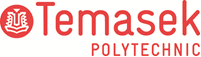

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [206]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: The goal of this project is to develop a machine learning model that predicts an individual’s risk of stroke based on demographic and clinical attributes, in order to support early identification of high-risk patients and enable timely medical intervention.

# 2. Data Understanding

## 2.1 Load dataset

In [207]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'stroke-data.csv'
df = pd.read_csv(FILE_PATH)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2.2 Summary Statistics

In [208]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [209]:
## Check for missing data
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

After checking for missing data. There is only 1 column that contains missing values (bmi). There is 201 number of missing rows in the bmi column. All other columns have 0 missing data. That means 201 ot of the 5110 records (around 3.9%) are missing BMI data

In [210]:
## Describe data distribution
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


**Breakdown of data distribution**

Age shows a wide and realistic distribution, with stroke typically increasing in the older age groups. This supports age as a key predictive feature. Secongly, Hypertension and heart disease are relatively infrequent in this dataset, when compared to global adult prevelance it is under represented, as global averages are around 30% while my only ~10% of my dataset has Hypertension or heart disease. Despite their lower frequency, both conditions are clinically significant risk factors for stroke and are therefore important predictors during modelling. Lastly, Several categorical features are dominated by a single category, which may influence model learning. Proper encoding will be required to ensure that the minority categories are not underrepresented during the model training.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [211]:
## Understanding distribution of target
col_y = 'stroke'

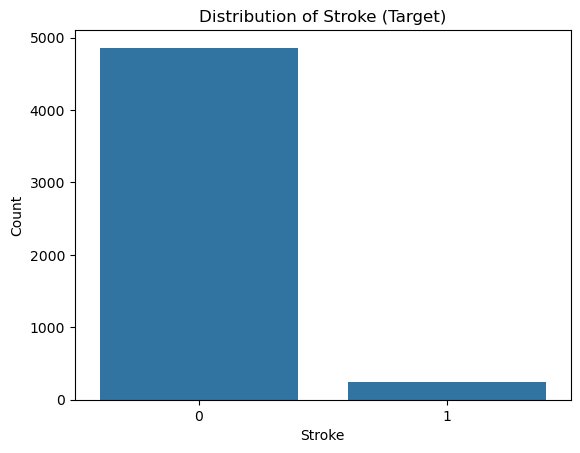

In [212]:
# Visualizing the distribution of the target variable (stroke)
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke (Target)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


The target variable is imbalanced, with stroke cases representing a small fraction of the dataset. This reflects real-world stats but introduces challenges for model evaluation. As a result, accuracy alone is insufficient, and greater emphasis is placed on recall and F1-score to ensure the model effectively identifies high-risk stroke patients.

### 2.3.1.2 Understanding distribution of features

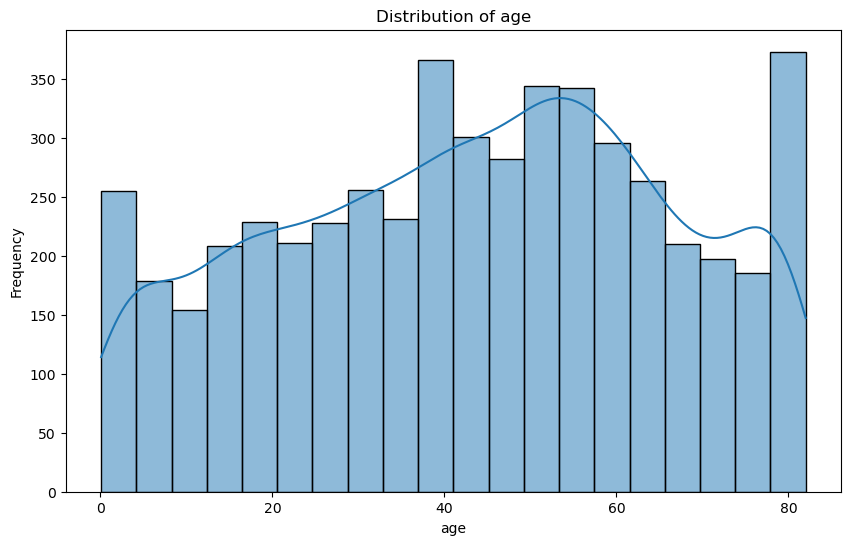

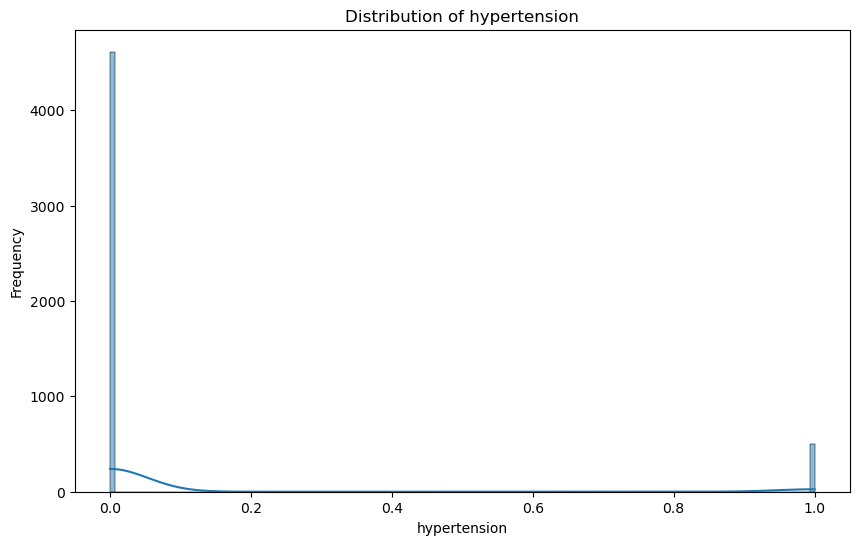

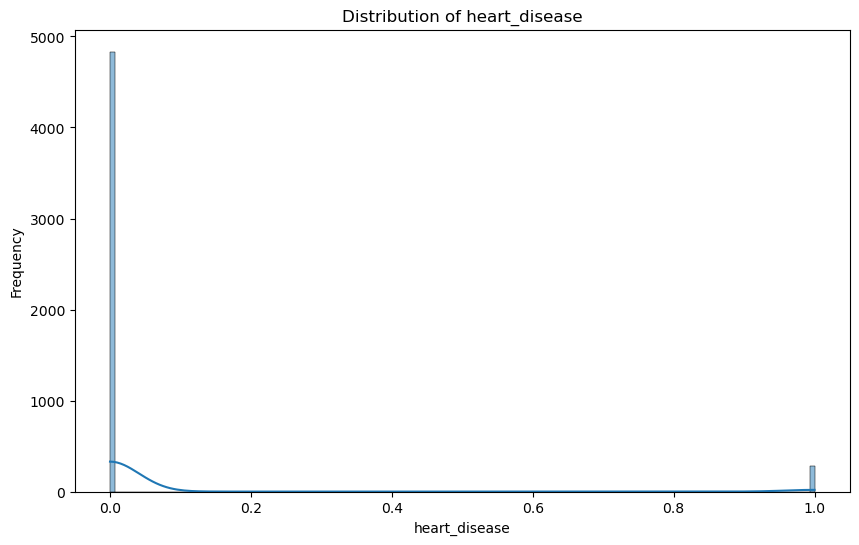

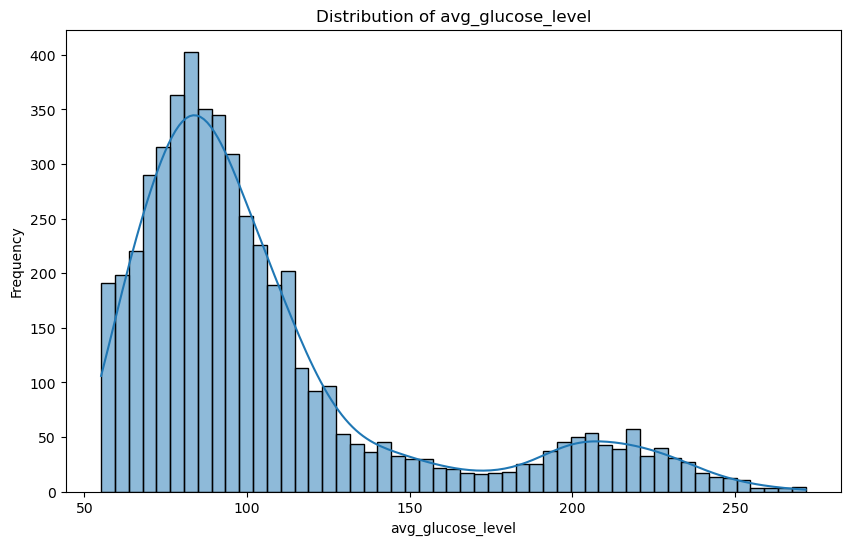

In [213]:
## Understanding distribution of features
# Visualizing the distribution of some numerical features (e.g., age, blood pressure)
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### 2.3.2 Understanding relationship between variables

In [214]:
## Understanding relationship between variables
col_numeric = df.select_dtypes(include=['float', 'int']).columns

df_corr = df[col_numeric].corr()
df_corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


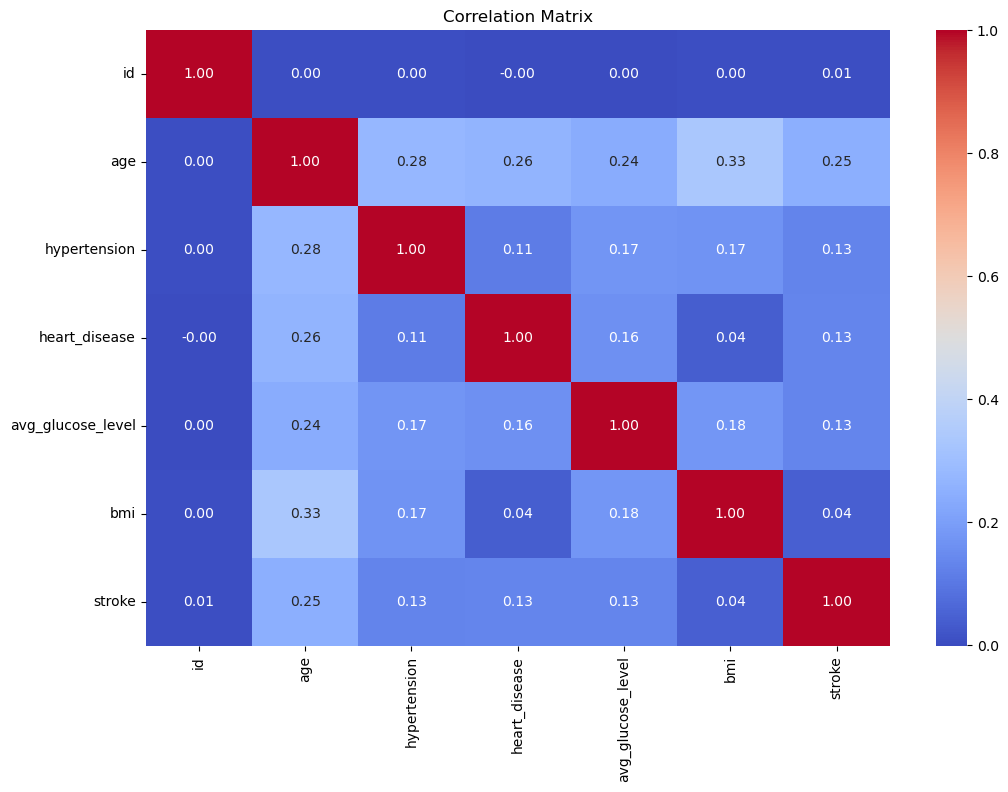

In [215]:
# Correlation matrix and heatmap
correlation_matrix = df[col_numeric].corr()  # Use only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [216]:
## Clean data

# Create a copy of the dataset to preserve the original data
df_clean = df.copy()

# Drop non-informative identifier column
df_clean.drop(columns=['id'], inplace=True)

# Impute missing BMI values using the median
bmi_median = df_clean['bmi'].median()
df_clean['bmi'].fillna(bmi_median, inplace=True)

# Verify that there are no missing values remaining
df_clean.isna().sum()


C:\Users\Benjamin\AppData\Local\Temp\ipykernel_26900\2823142459.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bmi'].fillna(bmi_median, inplace=True)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

The data set has been cleaned, non-informative collumns such as id has been dropped, and as for missing BMI value, the median was inputed as the BMI, as only 200 BMI values were missing out of the 5000.

## 3.2 Train-Test Split

In [217]:
## Split data into train set and test set

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_clean.drop(columns=['stroke'])
y = df_clean['stroke']

# Split the data into training and testing sets
# Stratify is used to preserve class imbalance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2026,
    stratify=y
)

# Check the shape of the splits
X_train.shape, X_test.shape


((4088, 10), (1022, 10))

An 80–20 train–test split was selected to balance model learning and evaluation reliability.

With a dataset of 5,110 samples, allocating 80% of the data to training ensures that the model has sufficient examples to learn meaningful patterns, particularly for the minority stroke class. At the same time, reserving 20% of the data for testing provides an independent and representative set of unseen data to evaluate model generalisation.

## 3.3 OHE

In [218]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessing: encode categorical features and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

# Build pipeline with preprocessing and Logistic Regression model
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
log_reg_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 4. Modelling

## 4.1 Basline Model Evaluation

In [219]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Predict using Logistic Regression pipeline
y_pred_lr = log_reg_model.predict(X_test)

# Evaluation metrics
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_lr))



Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Confusion Matrix
[[972   0]
 [ 50   0]]


c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

### 4.2 Train Model

In [220]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree pipeline (no scaling needed, but we reuse preprocessing)
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])

# Train Decision Tree
dt_model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 5. Model Evaluation

In [221]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions using Decision Tree model
y_pred_dt = dt_model.predict(X_test)

print("Final Model: Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))


Final Model: Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       972
           1       0.05      0.04      0.04        50

    accuracy                           0.91      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.91      0.91      0.91      1022

Confusion Matrix
[[930  42]
 [ 48   2]]


In [222]:
## New data

## Predict


## Iterative model development


### 6.1 Hyperparameter Tuning (Decision Tree)

In [223]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter distributions (≤ 3 values per parameter)
param_dist = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_leaf': [5, 10, 20]
}

# Randomized search (compliant with spec)
random_search = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=5,              # small, reasonable search
    scoring='recall',      # prioritise stroke detection
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Extract best model
best_dt_model = random_search.best_estimator_

# Show best parameters
random_search.best_params_


{'classifier__min_samples_leaf': 10, 'classifier__max_depth': 3}

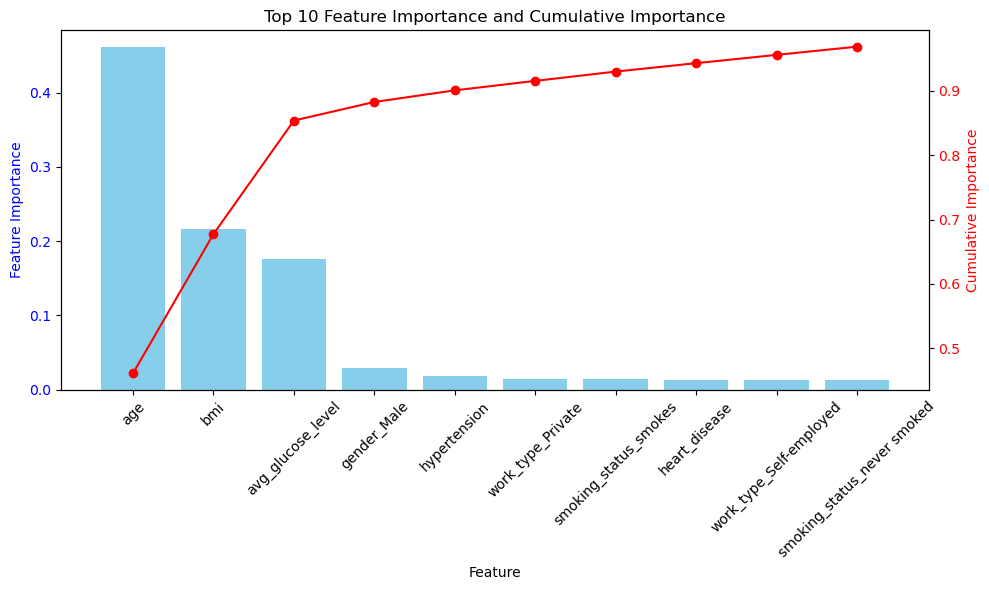

In [224]:
## Visualize feature importance

import matplotlib.pyplot as plt

# Plot top N features for clarity
TOP_N = 10
df_plot = df_dt_feat_impt.head(TOP_N)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Vertical bar chart for feature importance
ax1.bar(
    df_plot['Feature'],
    df_plot['Importance'],
    color='skyblue'
)
ax1.set_xlabel('Feature')
ax1.set_ylabel('Feature Importance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Line chart for cumulative importance
ax2 = ax1.twinx()
ax2.plot(
    df_plot['Feature'],
    df_plot['Cumulative Importance'],
    color='red',
    marker='o'
)
ax2.set_ylabel('Cumulative Importance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Top {TOP_N} Feature Importance and Cumulative Importance')
plt.tight_layout()
plt.show()


## Dropping less important features

In [238]:
# Define selected features
selected_features = [
    'age',
    'bmi',
    'avg_glucose_level',
    'gender',
    'hypertension'
]

# Create reduced feature dataset
X_reduced = df_clean[selected_features]
y_reduced = y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced,
    y_reduced,
    test_size=0.2,
    stratify=y_reduced,
    random_state=2026
)



In [239]:
## Further feature engineering / feature selection

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Identify categorical and numerical columns
cat_cols_reduced = ['gender']
num_cols_reduced = ['age', 'bmi', 'avg_glucose_level', 'hypertension']

# Preprocessing
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols_reduced),
        ('cat', OneHotEncoder(drop='first'), cat_cols_reduced)
    ]
)

# Reduced-feature Decision Tree model
dt_model_reduced = Pipeline(steps=[
    ('preprocessor', preprocessor_reduced),
    ('classifier', DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=2026
    ))
])

# Train model
dt_model_reduced.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 6.2 Evlauating new model

In [240]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_dt_reduced = dt_model_reduced.predict(X_test)

print("Reduced Feature Decision Tree")
print(classification_report(y_test, y_pred_dt_reduced))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt_reduced))


Reduced Feature Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       972
           1       0.12      0.84      0.20        50

    accuracy                           0.68      1022
   macro avg       0.55      0.75      0.50      1022
weighted avg       0.95      0.68      0.77      1022

Confusion Matrix
[[650 322]
 [  8  42]]


In [241]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_pred_dt_reduced)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.6771037181996086


The reduced-feature Decision Tree model does not show overfitting. Instead, it demonstrates controlled regularisation by prioritising recall for stroke cases at the expense of overall accuracy. While the model produces more false positives, it substantially reduces false negatives, correctly identifying most stroke cases. This trade-off is appropriate for medical risk prediction

In [243]:
# Define selected features (added heart_disease)
selected_features = [
    'age',
    'bmi',
    'avg_glucose_level',
    'gender',
    'hypertension',
    'heart_disease'
]

# Create reduced feature dataset
X_reduced = df_clean[selected_features]
y_reduced = y

from sklearn.model_selection import train_test_split

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced,
    y_reduced,
    test_size=0.2,
    stratify=y_reduced,
    random_state=2026
)


In [246]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Identify categorical and numerical columns
cat_cols_reduced = ['gender']
num_cols_reduced = [
    'age',
    'bmi',
    'avg_glucose_level',
    'hypertension',
    'heart_disease'
]

# Preprocessing
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols_reduced),
        ('cat', OneHotEncoder(drop='first'), cat_cols_reduced)
    ]
)

# Reduced-feature Decision Tree model (with added feature)
dt_model_added = Pipeline(steps=[
    ('preprocessor', preprocessor_reduced),
    ('classifier', DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=2026
    ))
])

# Train model
dt_model_added.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [245]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict using the added-feature Decision Tree model
y_pred_dt_added = dt_model_added.predict(X_test)

print("Added Feature Decision Tree")
print(classification_report(y_test, y_pred_dt_added))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt_added))

test_acc = accuracy_score(y_test, y_pred_dt_added)
print("Test Accuracy:", test_acc)


Added Feature Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       972
           1       0.16      0.76      0.27        50

    accuracy                           0.80      1022
   macro avg       0.57      0.78      0.58      1022
weighted avg       0.94      0.80      0.85      1022

Confusion Matrix
[[777 195]
 [ 12  38]]
Test Accuracy: 0.7974559686888454


In [ ]:
## probabilities and odds

import pandas as pd
import numpy as np

# Predict probabilities on test set
proba = dt_model_added.predict_proba(X_test)

# Extract probability of stroke (class 1)
stroke_prob = proba[:, 1]

# Convert probability to odds
stroke_odds = stroke_prob / (1 - stroke_prob)

# Create a results DataFrame
odds_df = pd.DataFrame({
    'Stroke_Probability': stroke_prob,
    'Stroke_Odds': stroke_odds
})

odds_df.head()


,Stroke_Probability,Stroke_Odds
0,0.473735,0.900184
1,0.351850,0.542853
2,0.000000,0.000000
3,0.000000,0.000000
4,0.659789,1.939353


In [249]:
mock_data = pd.DataFrame({
    'age': [60],
    'bmi': [29.5],
    'avg_glucose_level': [160],
    'gender': ['Male'],
    'hypertension': [1],
    'heart_disease': [0]
})

# Predict probability
mock_proba = dt_model_added.predict_proba(mock_data)[0, 1]

# Convert to odds
mock_odds = mock_proba / (1 - mock_proba)

print(f"Stroke Probability: {mock_proba:.2f}")
print(f"Stroke Odds: {mock_odds:.2f}")


Stroke Probability: 0.47
Stroke Odds: 0.90


## Streamlit

In [ ]:
import joblib

joblib.dump(dt_model_added, 'dt_model_added.pkl')